In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [44]:
#loading data
df= pd.read_csv("shot_logs.csv")
print(df.shape)

(128069, 21)


In [45]:
#droping not needed columns
df = df[['SHOT_DIST','FGM']]
df = df.groupby(['SHOT_DIST']).agg(FG_Made=('FGM',np.sum),FG_Attempted=('FGM','count')).reset_index()

Text(0, 0.5, '3point_shots')

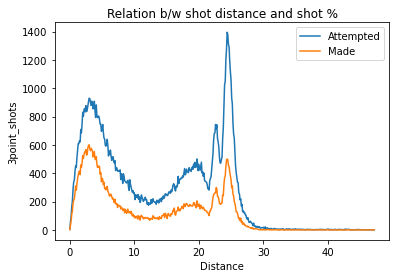

In [46]:
plt.title("Relation b/w shot distance and shot %")
plt.plot(df['SHOT_DIST'],df['FG_Attempted'],label='Attempted')
plt.plot(df['SHOT_DIST'],df['FG_Made'],label='Made')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('3point_shots')

In [47]:
#persentage of shots made
df['persentage_of_shots'] = (df['FG_Made']/df['FG_Attempted']).mul(100).round(1)
df = df.drop(['FG_Made','FG_Attempted'],axis=1)

# Matrixs to find line

In [48]:
#creating matrix
n=len(df['persentage_of_shots'])
y_matrix = np.zeros((n,1))
mc_matrix = np.zeros((2,1))
x_matrix = np.zeros((n,2))

In [49]:
#putting values in matrixes
y_matrix[:,0] = df['persentage_of_shots']
x_matrix[:,0] = df['SHOT_DIST']
x_matrix[:,1] = 1

In [50]:
# finding m and c(slop and y-intercept)
x_transpose = np.transpose(x_matrix)
mc_matrix = np.dot(np.linalg.inv(np.dot(x_transpose,x_matrix)),np.dot(x_transpose,y_matrix))#

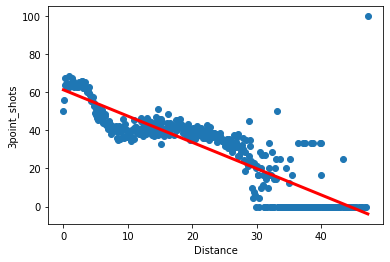

In [69]:
#plotting line on data points
plt.scatter(df['SHOT_DIST'],df['persentage_of_shots'])
plt.xlabel('Distance')
plt.ylabel('3point_shots')
plt.plot(x_matrix[:,0],(x_matrix[:,0] * mc_matrix[0,0])+mc_matrix[1,0],c='red',linewidth=3)

# Using sklearn's model(Linear Regression)

In [53]:
#spliting features and target

X= df.drop("persentage_of_shots",axis=1)# independent featuures
Y=df["persentage_of_shots"] # dependent features

In [54]:
#splitting testing and training data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.15,random_state=50)

In [55]:
lr = LinearRegression()

In [56]:
# training
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
#testing dataset on model and making prediction
pred = lr.predict(x_test)

# plotting actual result with prediction(SK_learn)

Text(0, 0.5, 'predict')

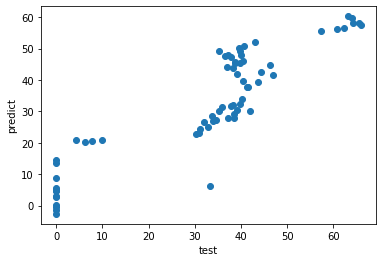

In [71]:
#plotting actual result with prediction
plt.scatter(y_test,pred)
plt.xlabel('test')
plt.ylabel('predict')

In [59]:
#plotting acuracy score
print("Score = ",lr.score(x_test,y_test))

Score =  0.8162615711092208


# plotting actual result with prediction(from line found using matrixs)

Text(0, 0.5, 'predict')

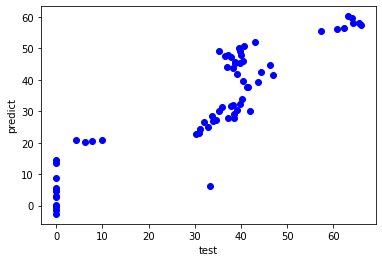

In [72]:
plt.scatter(y_test,(x_test * mc_matrix[0,0])+mc_matrix[1,0],c='blue')
plt.xlabel('test')
plt.ylabel('predict')